# Attempts to implement SIFT algorithm

First module task was the hardest one(or at least I hope so). Having zero expierience with computer vision it was hard to catch all the context so it takes me some

[Paper](https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf)

## OpenCV SIFT

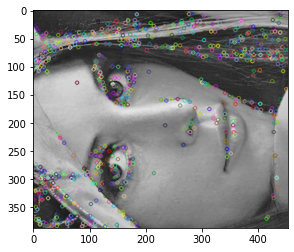

In [1]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('./res/lenna_grey_cropped.png')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.SIFT_create()
keypoints_1, _ = sift.detectAndCompute(img1,None)

img_kp = cv2.drawKeypoints(gray1,keypoints_1,gray1)
plt.imshow(img_kp);

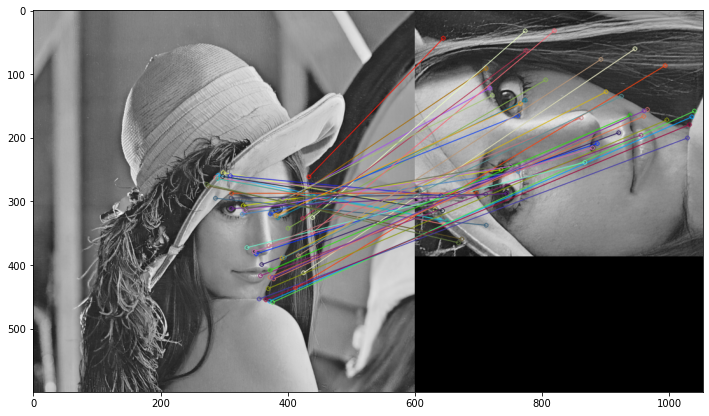

In [2]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('./res/lenna_grey.png')  
img2 = cv2.imread('./res/lenna_grey_cropped.png') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(12,18))
plt.imshow(img3),plt.show();

## My SIFT

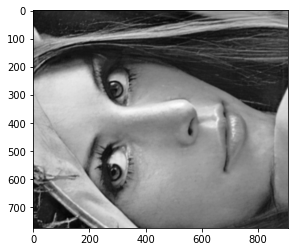

In [3]:
import cv2 
import matplotlib.pyplot as plt
from my_sift import SIFT_create
%matplotlib inline


image = cv2.imread('./res/lenna_grey_cropped.png')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sift = SIFT_create()

base = sift._createInitialImage(gray_img)

plt.imshow(base, cmap='gray');


9 6


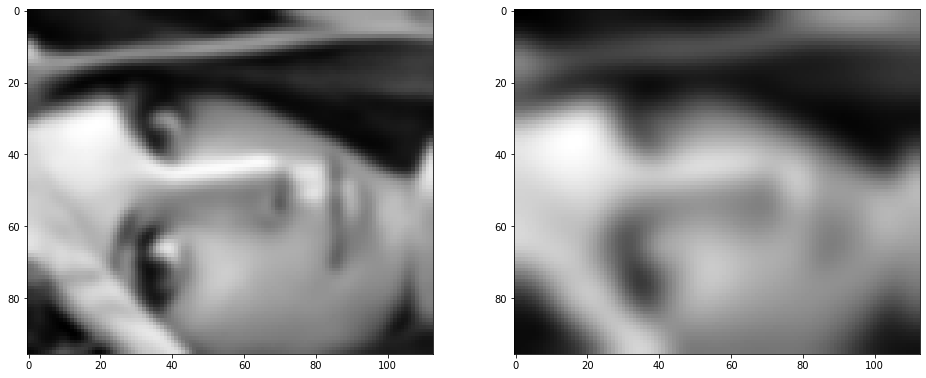

In [4]:
# Gausian pyramid
gaussian_pyramid = sift._buildGaussianPyramid(base)

print(len(gaussian_pyramid), len(gaussian_pyramid[0]))

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(gaussian_pyramid[3][0], cmap='gray')
ax[1].imshow(gaussian_pyramid[3][4], cmap='gray');

9 5


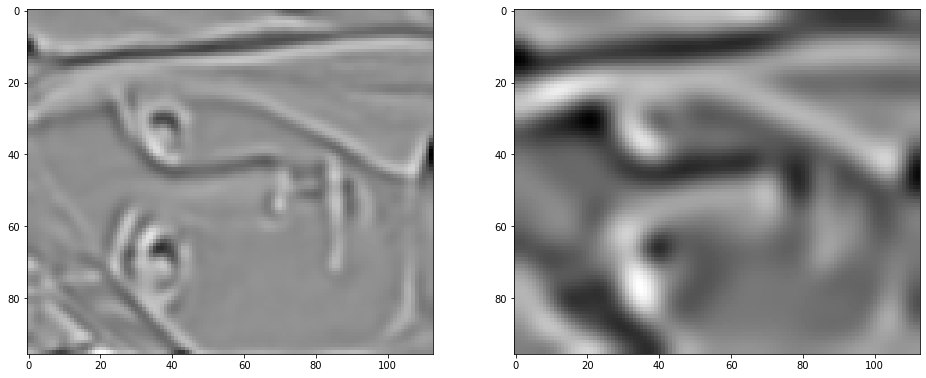

In [5]:
# dog pyramid
dog_pyramid = sift._buildDoGPyramid(gaussian_pyramid)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

print(len(dog_pyramid), len(dog_pyramid[0]))

ax[0].imshow(dog_pyramid[3][0], cmap='gray')
ax[1].imshow(dog_pyramid[3][4], cmap='gray');

752


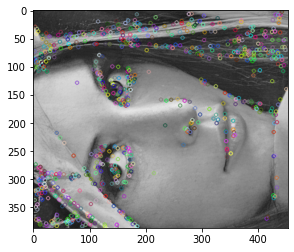

In [6]:
# Test keypoints
import cv2 
import matplotlib.pyplot as plt
from my_sift import SIFT_create

%matplotlib inline


image = cv2.imread('./res/lenna_grey_cropped.png')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sift = SIFT_create()

keypoints, decsriptors = sift.detectAndCompute(gray_img)

print(len(keypoints))

# convert keypoints to cv2 class
cv_kps = [kp.to_cv2() for kp in keypoints]

image_with_kp = cv2.drawKeypoints(image, cv_kps, image)
plt.imshow(image_with_kp);

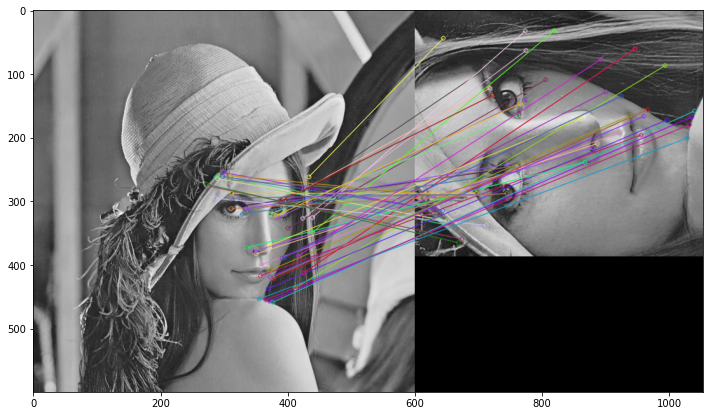

In [7]:
# Test keypoints and descriptors
import cv2 
from my_sift import SIFT_create
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('./res/lenna_grey.png')  
img2 = cv2.imread('./res/lenna_grey_cropped.png') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2)

# convert keypoints to cv2 format
keypoints_1 = [kp.to_cv2() for kp in keypoints_1]
keypoints_2 = [kp.to_cv2() for kp in keypoints_2]

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(12,18))
plt.imshow(img3),plt.show();

## Benchmarks

### My OpenCV

In [1]:
import cv2
from my_sift import SIFT_create, SIFTKeyPoint
import numpy as np
from brown_phototour_revisited.dataset import *
from brown_phototour_revisited.extraction import *
from brown_phototour_revisited.benchmarking import *
patch_size = 32


def get_center_kp(PS=65.):
    c = PS/2.0
    center_kp = SIFTKeyPoint((c,c))
    center_kp.size = PS/5.303
    return center_kp

sift = SIFT_create()
center_kp = get_center_kp(patch_size)

def extract_opencv_sift(patch):
    #Convert back to UINT8 and provide aux keypoint in the center of the patch
    return sift.compute((255*patch).astype(np.uint8),[center_kp])[1][0].reshape(128)

descs_out_dir = 'benchmarks/brown_phototour_revisited/descriptors'
download_dataset_to = 'benchmarks/brown_phototour_revisited/dataset'


# as my implementation is slow hardcoded 5k images and brake dataloader cycle in benchmark
desc_dict_sift = extract_numpyinput_descriptors(extract_opencv_sift,
                                'My_OpenCV_SIFT',
                                subset= 'notredame', 
                                path_to_save_dataset = download_dataset_to,
                                path_to_save_descriptors = descs_out_dir,
                                patch_size = patch_size)

# Found cached data benchmarks/brown_phototour_revisited/dataset/notredame.pt
benchmarks/brown_phototour_revisited/descriptors/My_OpenCV_SIFT_32px_notredame.npy already exists, loading


In [4]:
mAP_SIFT = evaluate_mAP_snn_based(desc_dict_sift['descriptors'],
                             desc_dict_sift['labels'], 
                             desc_dict_sift['img_idxs'],
                            path_to_save_mAP = 'data/mAP/My_OpenCV_SIFT65_notredame.npy',
                            backend='numpy')
print (f'OpenCV SIFT PS = {patch_size}, mAP on Notredame = {mAP_SIFT:.5f}')

### OpenCV

In [1]:
import cv2
import numpy as np
from brown_phototour_revisited.dataset import *
from brown_phototour_revisited.extraction import *
from brown_phototour_revisited.benchmarking import *
patch_size = 32

# https://github.com/hpatches/hpatches-benchmark/blob/master/python/extract_opencv_sift.py#L43
def get_center_kp(PS=65.):
    c = PS/2.0
    center_kp = cv2.KeyPoint()
    center_kp.pt = (c,c)
    center_kp.size = PS/5.303
    return center_kp


sift = cv2.SIFT_create()
center_kp = get_center_kp(patch_size)

def extract_opencv_sift(patch):
    #Convert back to UINT8 and provide aux keypoint in the center of the patch
    return sift.compute((255*patch).astype(np.uint8),[center_kp])[1][0].reshape(128)

descs_out_dir = 'benchmarks/brown_phototour_revisited/descriptors'
download_dataset_to = 'benchmarks/brown_phototour_revisited/dataset'


desc_dict_sift = extract_numpyinput_descriptors(extract_opencv_sift,
                                'OpenCV_SIFT',
                                subset= 'notredame', 
                                path_to_save_dataset = download_dataset_to,
                                path_to_save_descriptors = descs_out_dir,
                                patch_size = patch_size)

Using downloaded and verified file: benchmarks/brown_phototour_revisited/dataset/notredame.zip
# Extracting data benchmarks/brown_phototour_revisited/dataset/notredame.zip

# Caching data benchmarks/brown_phototour_revisited/dataset/notredame.pt


In [5]:
mAP_SIFT = evaluate_mAP_snn_based(desc_dict_sift['descriptors'],
                             desc_dict_sift['labels'], 
                             desc_dict_sift['img_idxs'],
                            path_to_save_mAP = 'data/mAP/OpenCV_SIFT65_notredame.npy',
                            backend='pytorch-cuda')
print (f'OpenCV SIFT PS = {patch_size}, mAP on Notredame = {mAP_SIFT:.5f}')

OpenCV SIFT PS = 32, mAP on Notredame = 0.45925
